# Stock Prediction Model

## Dependencies

### Library Installation (if needed)

In [48]:
#! pip install -Ur requirements.txt

### Importing Required Libraries

In [2]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import pickle
import gradio as gr
import ast
import warnings
from datetime import datetime
from tqdm import tqdm
from model import MLPWrapper
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
from stockdex import Ticker

In [10]:
symbol = "MSFT"
ticker = Ticker(ticker=symbol)
income_statement = ticker.macrotrends_income_statement
income_statement

<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequence '\/'
<string>:1: SyntaxWarning: invalid escape sequen

,2024-06-30,2023-06-30,2022-06-30,2021-06-30,2020-06-30,2019-06-30,2018-06-30,2017-06-30,2016-06-30,2015-06-30,2014-06-30,2013-06-30,2012-06-30,2011-06-30,2010-06-30,2009-06-30
field_name,,,,,,,,,,,,,,,,
Revenue,245122.00000,211915.00000,198270.00000,168088.00000,143015.00000,125843.00000,110360.00000,96571.00000,91154.00000,93580.00000,86833.00000,77849.00000,73723.00000,69943.00000,62484.00000,58437.00000
Cost Of Goods Sold,74114.00000,65863.00000,62650.00000,52232.00000,46078.00000,42910.00000,38353.00000,34261.00000,32780.00000,33038.00000,27078.00000,20385.00000,17530.00000,15577.00000,12395.00000,12155.00000
Gross Profit,171008.00000,146052.00000,135620.00000,115856.00000,96937.00000,82933.00000,72007.00000,62310.00000,58374.00000,60542.00000,59755.00000,57464.00000,56193.00000,54366.00000,50089.00000,46282.00000
Research And Development Expenses,29510.00000,27195.00000,24512.00000,20716.00000,19269.00000,16876.00000,14726.00000,13037.00000,11988.00000,12046.00000,11381.00000,10411.00000,9811.00000,9043.00000,8714.00000,9010.00000
SG&A Expenses,32065.00000,30334.00000,27725.00000,25224.00000,24709.00000,23098.00000,22223.00000,19942.00000,19198.00000,20324.00000,20488.00000,20289.00000,18426.00000,18162.00000,17277.00000,16909.00000
Other Operating Income Or Expenses,,,,,,,,,,,,,,,,
Operating Expenses,61575.00000,57529.00000,52237.00000,45940.00000,43978.00000,39974.00000,36949.00000,33285.00000,32296.00000,42381.00000,31996.00000,30700.00000,34430.00000,27205.00000,25991.00000,25919.00000
Operating Income,109433.00000,88523.00000,83383.00000,69916.00000,52959.00000,42959.00000,35058.00000,29025.00000,26078.00000,18161.00000,27759.00000,26764.00000,21763.00000,27161.00000,24098.00000,20363.00000
Total Non-Operating Income\/Expense,-1646.00000,788.00000,333.00000,1186.00000,77.00000,729.00000,1416.00000,876.00000,-439.00000,346.00000,61.00000,288.00000,504.00000,910.00000,915.00000,-542.00000


In [50]:
from stockdex import Ticker
from datetime import datetime

ticker = Ticker(ticker="AAPL")

# Price data (use range and dataGranularity to make range and granularity more specific) from Yahoo Finance API
price = ticker.yahoo_api_price(range='1y', dataGranularity='1d')

# plot financial data using Plotly
ticker = Ticker(ticker="MSFT")
ticker.plot_yahoo_api_financials(group_by="field")

# Complete historical data of the stock in certain categories from digrin website
dividend = ticker.digrin_dividend

# Financial data from macrotrends website
income_statement = ticker.macrotrends_income_statement

# Summary including general financial information from Yahoo Finance website
summary = ticker.yahoo_web_summary

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: SyntaxWarning:

invalid escape sequence '\/'

<string>:1: Sy

### Variables

In [7]:
warnings.filterwarnings("ignore", category=FutureWarning)
symbol_list = input("Symbols: ('simple', 'filtered' or 'all')") # 'simple' or 'all'. simple are the tickers from the screener notebook and all are all of the tickers in 'filtered_tickers'. You may also an 'Int' to get a % amount of random tickers from 'all'
if symbol_list:
    build_new_dataset = True
else:
    build_new_dataset = False
    symbol_list = 'filtered'
minimum_feature_threshold = 0.6
outlier = 3
iterations = ast.literal_eval(f"{input("Iterations eg. '10', '20', '30'")}")
if iterations:
    train_new_model = True
    search_params = {
            "hidden_layer_amount": Integer(2, 20),
            "neuron_amount": Integer(20, 4000),
            "warm_start": Categorical([False, True]),
            "activation": Categorical(['identity', 'logistic', 'tanh', 'relu']),
            "solver": Categorical(['sgd', 'adam', 'lbfgs']),
            "alpha": Real(0.000001, 1),
            "learning_rate_init": Real(0.00001, 0.1),
            "power_t": Real(0.0001, 100),
            "momentum": Real(0.0001, 100),
            "validation_fraction": Real(0.05, 0.20),
            "beta_1": Real(0.001, 10),
            "beta_2": Real(0.0001, 100),
            "epsilon": Real(0.0000000001, 0.000001),}
    cross_validations = 2  # will be set to 3 if not specified
    verticle_jobs = 1 #'-1' for max
if build_new_dataset or train_new_model:
    debugging = {'True': True, 'False': False}.get(input('Debug? (Bool)'))
else:
    debugging = False

## Data Preparation

In [8]:
symbols = pd.read_csv('../data/simple_tickers.csv')['Ticker'].tolist()
if symbol_list == 'filtered':
    symbols = symbols + pd.read_csv('../data/filtered_tickers.csv')['Ticker'].tolist()
elif symbol_list == 'all':
    symbols = symbols + pd.read_csv('../data/tickers.csv')['Ticker'].tolist()
elif symbol_list.isdigit():
    all_symbols = pd.read_csv('../data/tickers.csv')['Ticker'].tolist()
    num_symbols = max(1, round(len(all_symbols) * (int(symbol_list) / 100)))  
    symbols = symbols + pd.read_csv("../data/filtered_tickers.csv")["Ticker"].tolist()
    symbols = symbols + np.random.choice(all_symbols, num_symbols, replace=False).tolist()

symbols = pd.Series(symbols).unique()
symbols

array(['MATAS.CO', 'TRIFOR.CO', 'RNMBY', ..., 'ZION', 'CCJ', 'JBL'],
      shape=(1930,), dtype=object)

#### Download annual financial data

In [9]:
if build_new_dataset:
    df = pd.DataFrame()
    filtered_pd = pd.read_csv('../data/filtered_tickers.csv')
    for symbol in tqdm(symbols, smoothing=0):
        ticker_df = pd.DataFrame()
        ticker = yf.Ticker(symbol)
        try:
            # Latest earning data
            latest_earning_date = ticker.quarterly_cash_flow.columns.tolist()[0]
            latest_data = {'Ticker': symbol, 'Name': ticker.info["shortName"], 'Date': latest_earning_date}
            latest_data['3M Future Change'] = np.nan
            latest_data['6M Future Change'] = np.nan
            latest_data['9M Future Change'] = np.nan
            latest_data['1Y Future Change'] = np.nan
            try:
                latest_data['Sector'] = ticker.info['sector']
            except:
                latest_data['Sector'] = 'Unknown'
            try:
                latest_data['Industry'] = ticker.info['industry']
            except:
                latest_data['Industry'] = 'Unknown'
            for column in ticker.quarterly_cash_flow[latest_earning_date].keys().tolist():
                latest_data[column] = ticker.quarterly_cash_flow[latest_earning_date][column]
            for column in ticker.quarterly_balance_sheet[latest_earning_date].keys().tolist():
                latest_data[column] = ticker.quarterly_balance_sheet[latest_earning_date][column]
            for column in ticker.quarterly_income_stmt[latest_earning_date].keys().tolist():
                latest_data[column] = ticker.quarterly_income_stmt[latest_earning_date][column]
            ticker_df = pd.concat([ticker_df, pd.DataFrame([latest_data])], ignore_index=True)

            # Annual data
            earning_dates = ticker.cash_flow.columns.tolist()
            if len(earning_dates) == 5:
                earning_dates.remove(earning_dates[4])
            else:
                if symbol in filtered_pd['Ticker'].tolist():
                    filtered_pd = filtered_pd[filtered_pd['Ticker'] != symbol]
                if debugging:
                    print(f"{symbol} had {len(earning_dates)} earning dates, not 5")
                continue
            price_data = yf.download(symbol, period='5y', rounding=False, progress=False)
            cash_flow = ticker.cash_flow
            cash_flow_columns = cash_flow[earning_dates[0]].keys().tolist()
            balance_sheet = ticker.balance_sheet
            balance_sheet_columns = balance_sheet[earning_dates[0]].keys().tolist()
            income_statement = ticker.income_stmt
            income_statement_columns = income_statement[earning_dates[0]].keys().tolist()
            for earning_date in earning_dates:
                earning_date_data = {'Ticker': symbol, 'Name': ticker.info["shortName"], 'Date': earning_date}
                got_price = False
                day_offset = 0
                while(got_price==False and day_offset > -6):
                    try:           
                        earning_date_data['3M Future Change'] = (
                            float(price_data.loc[earning_date + pd.Timedelta(days=day_offset, weeks=13) , ('Close', symbol)]) / 
                            float(price_data.loc[earning_date + pd.Timedelta(days=day_offset), ('Close', symbol)]) - 1
                        )
                        earning_date_data['6M Future Change'] = (
                            float(price_data.loc[earning_date + pd.Timedelta(days=day_offset, weeks=26) , ('Close', symbol)]) / 
                            float(price_data.loc[earning_date + pd.Timedelta(days=day_offset), ('Close', symbol)]) - 1
                        )
                        earning_date_data['9M Future Change'] = (
                            float(price_data.loc[earning_date + pd.Timedelta(days=day_offset, weeks=39) , ('Close', symbol)]) / 
                            float(price_data.loc[earning_date + pd.Timedelta(days=day_offset), ('Close', symbol)]) - 1
                        )
                        earning_date_data['1Y Future Change'] = (
                            float(price_data.loc[earning_date + pd.Timedelta(days=day_offset, weeks=52) , ('Close', symbol)]) / 
                            float(price_data.loc[earning_date + pd.Timedelta(days=day_offset), ('Close', symbol)]) - 1
                        )
                        got_price = True
                    except:
                        day_offset += -1
                try:
                    earning_date_data['Sector'] = ticker.info['sector']
                except:
                    earning_date_data['Sector'] = 'Unknown'
                try:
                    earning_date_data['Industry'] = ticker.info['industry']
                except:
                    earning_date_data['Industry'] = 'Unknown'
                for column in cash_flow_columns:
                    earning_date_data[column] = cash_flow[earning_date][column]
                for column in balance_sheet_columns:
                    earning_date_data[column] = balance_sheet[earning_date][column]
                for column in income_statement_columns:
                    earning_date_data[column] = income_statement[earning_date][column]
                if got_price:
                    ticker_df = pd.concat([ticker_df, pd.DataFrame([earning_date_data])], ignore_index=True)
            
            if len(ticker_df) != 4:
                if symbol in filtered_pd['Ticker'].tolist():
                    filtered_pd = filtered_pd[filtered_pd['Ticker'] != symbol]
                    if debugging:
                        print(f'Removed {symbol} from filtered tickers because the length of the df was not 4, it was {len(ticker_df)}')
                else:
                    if debugging:
                        print(f'{symbol}: df was not 4, it was {len(ticker_df)}')
                continue

            if ticker_df.isna().sum().sum() < round(352 * minimum_feature_threshold):
                if symbol not in filtered_pd['Ticker'].tolist():
                    filtered_pd = pd.concat([filtered_pd, pd.DataFrame([{'Ticker': symbol}])])
                imputer = SimpleImputer()
                for column in ticker_df.columns.drop(['Ticker', 'Name', 'Date', '3M Future Change', '6M Future Change', '9M Future Change', '1Y Future Change', 'Sector', 'Industry']):
                    if not ticker_df[column].isna().all():
                        ticker_df[column] = imputer.fit_transform(ticker_df[[column]])
            else:
                if symbol in filtered_pd['Ticker'].tolist():
                    filtered_pd = filtered_pd[filtered_pd['Ticker'] != symbol]
                    if debugging:
                        print(f'Removed {symbol} from filtered tickers. Datapoints: {ticker_df.isna().sum().sum()}, Needed: {round(352 * minimum_feature_threshold)}')
                continue
            df = pd.concat([df, ticker_df], ignore_index=True)
        except Exception as error:
            if symbol in filtered_pd['Ticker'].tolist():
                filtered_pd = filtered_pd[filtered_pd['Ticker'] != symbol]
                if debugging:
                    print(f'Removed {symbol} from filtered tickers because an exception was raised \n {error}')
            else:
                if debugging:
                    print(f"{symbol}: exception raised: {error}")
            continue
    filtered_pd.to_csv('../data/filtered_tickers.csv', index=False)
    df.to_csv('../data/earnings_data.csv', index=False)
else:
    df = pd.read_csv('../data/earnings_data.csv')

### Short visualisation

In [10]:
if debugging:
    display(df)

### Impution and encoding

In [11]:
imputer = SimpleImputer()
scaler = StandardScaler()
for column in df.columns.drop(['Ticker', 'Name', 'Date', '3M Future Change', '6M Future Change', '9M Future Change', '1Y Future Change', 'Sector', 'Industry']):
    df[column] = imputer.fit_transform(df[[column]])
    scaler.fit(df[[column]])
    df[column] = scaler.transform(df[[column]])

le = LabelEncoder()
for column in ['Sector', 'Industry']:
    df[column] = df[column].astype(str)
    le.fit(df[column])
    df[column] = le.transform(df[column])

### Splitting

In [12]:
pred_data = pd.DataFrame()
test_data = pd.DataFrame()
train_data = pd.DataFrame()
for i in tqdm(range(int(len(df) / 4)), smoothing=0):
    cont = False
    for j in range(4):
        if (df.loc[j+i*4, "3M Future Change"] > outlier or
            df.loc[j+i*4, "6M Future Change"] > outlier or
            df.loc[j+i*4, "9M Future Change"] > outlier or
            df.loc[j+i*4, "1Y Future Change"] > outlier):
            cont = True
    if cont:
        continue
    pred_data = pd.concat([pred_data, df.iloc[[i*4]]]) 
    test_data = pd.concat([test_data, df.iloc[[1+i*4]]])
    train_data = pd.concat([train_data, df.iloc[[2+i*4]]])
    train_data = pd.concat([train_data, df.iloc[[3+i*4]]])
if debugging:
    print('Prediction Data:')
    display(pred_data)
    print("Test Data:")
    display(test_data)
    print('Training Data:')
    display(train_data)

100%|██████████| 1898/1898 [01:51<00:00, 17.02it/s]


### Labeling

In [13]:
training_columns = train_data.columns.drop(["Ticker", "Name", "Sector", "Industry", "Date", '3M Future Change', '6M Future Change', '9M Future Change', '1Y Future Change'])
label_columns = ['3M Future Change', '6M Future Change', '9M Future Change', '1Y Future Change']
X_pred = pred_data[training_columns]
X_test = test_data[training_columns]
y_test = test_data[label_columns]
X_train = train_data[training_columns]
y_train = train_data[label_columns]
if debugging:
    print("X_pred:")
    display(X_pred)
    print("X_test:")
    display(X_test)
    print("y_test:")
    display(y_test)
    print("X_train:")
    display(X_train)
    print("y_train:")
    display(y_train)

## Model Training

In [14]:
if train_new_model:
    opt = BayesSearchCV(
        MLPWrapper(),
        search_params,
        n_iter=iterations,
        random_state=42,
        cv=cross_validations
    )

    opt.fit(X_train, y_train.values)
    print(f"Best parameters: {opt.best_params_}")
    model = opt.best_estimator_
    
    # model = MLPRegressor(
    #     hidden_layer_sizes=hidden_layers,
    #     learning_rate="adaptive",
    #     early_stopping=True,
    #     verbose=True,
    #     tol=0.00001,
    #     n_iter_no_change=round(40000/hidden_layers[0]*4/len(hidden_layers))
    # )
    # print(f"iter_no_change: {model.n_iter_no_change}")
    # model.fit(X_train, y_train.values)

Trying: 9 layers, 1232 neurons per layer, iter_no_change=3
Hidden layer sizes: (1232, 1232, 1232, 1232, 1232, 1232, 1232, 1232, 1232)
Training completed. Iterations: 13, Final score: 0.0641 
Trying: 9 layers, 1232 neurons per layer, iter_no_change=3
Hidden layer sizes: (1232, 1232, 1232, 1232, 1232, 1232, 1232, 1232, 1232)
Training completed. Iterations: 6, Final score: -0.0046 
Trying: 3 layers, 2550 neurons per layer, iter_no_change=3
Hidden layer sizes: (2550, 2550, 2550)
Training completed. Iterations: 11, Final score: 0.1084 
Trying: 3 layers, 2550 neurons per layer, iter_no_change=3
Hidden layer sizes: (2550, 2550, 2550)
Training completed. Iterations: 10, Final score: 0.0302 
Trying: 10 layers, 2238 neurons per layer, iter_no_change=3
Hidden layer sizes: (2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238, 2238)
Training completed. Iterations: 8, Final score: -0.0010 
Trying: 10 layers, 2238 neurons per layer, iter_no_change=3
Hidden layer sizes: (2238, 2238, 2238, 2238, 2238,

## Testing and benchmarking

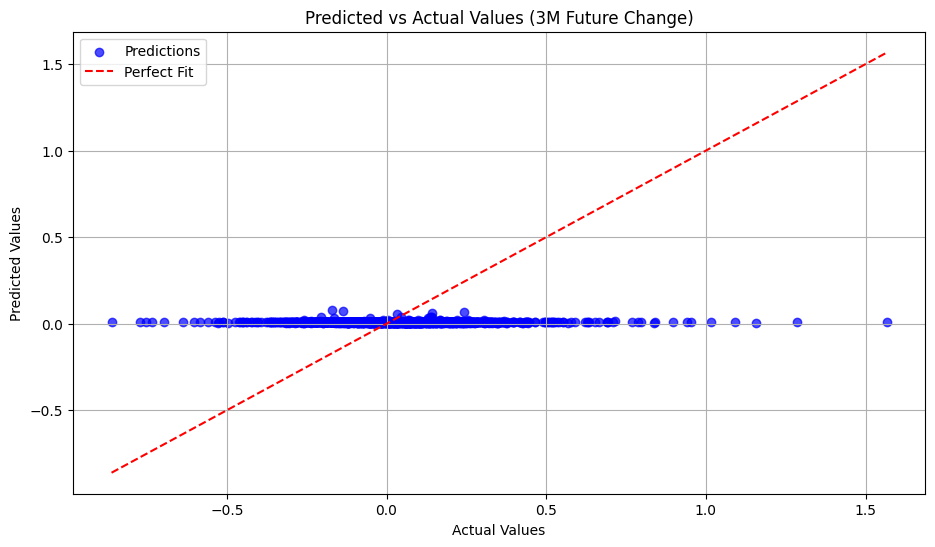

3M Future Change - R²: -0.0147
3M Future Change - MSE: 0.0398
3M Future Change - MAE: 0.1417


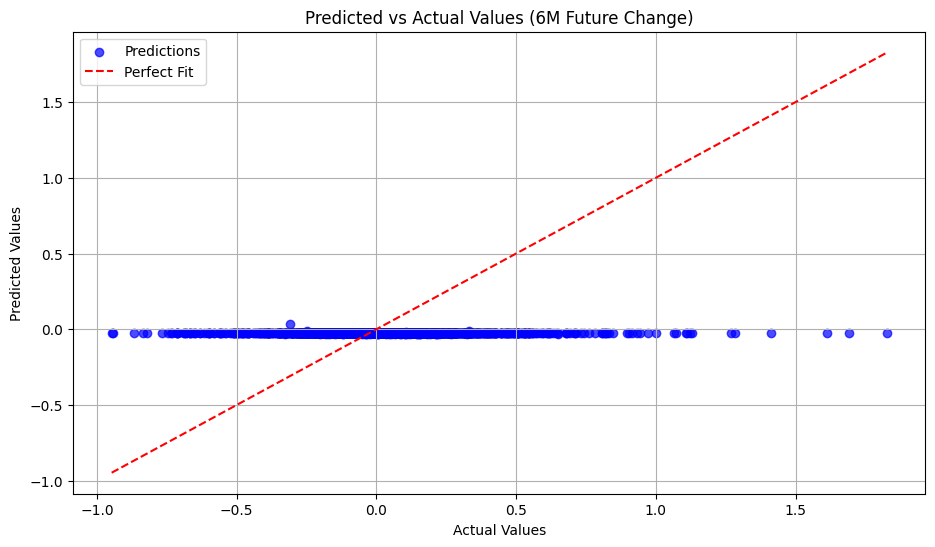

6M Future Change - R²: -0.0300
6M Future Change - MSE: 0.0751
6M Future Change - MAE: 0.1935


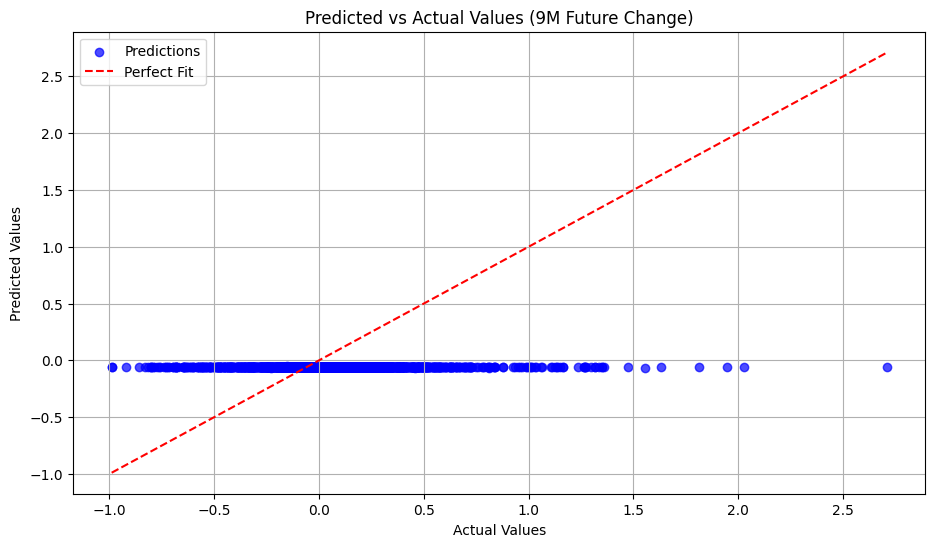

9M Future Change - R²: -0.1844
9M Future Change - MSE: 0.1374
9M Future Change - MAE: 0.2714


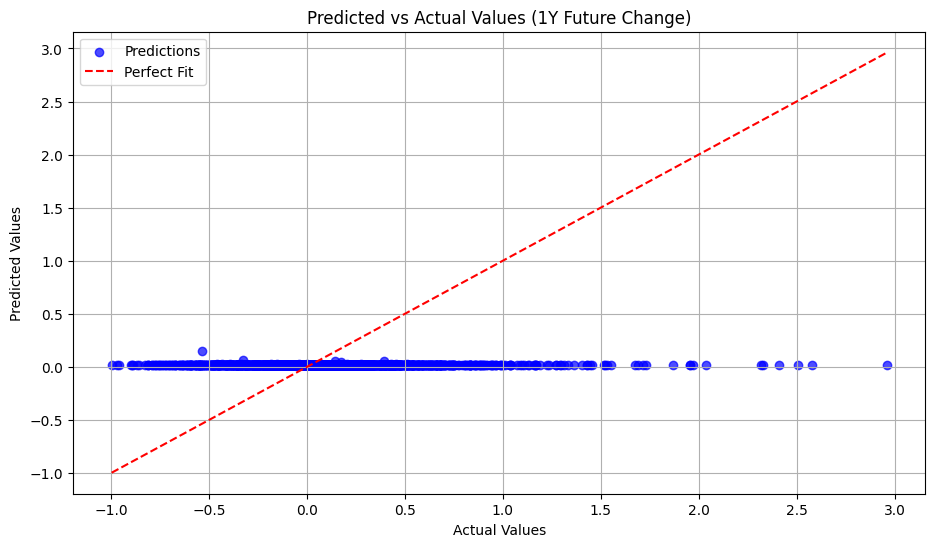

1Y Future Change - R²: -0.0447
1Y Future Change - MSE: 0.1830
1Y Future Change - MAE: 0.3063

Overall Scores:
Mean - R²: -0.0684
Mean - MSE: 0.1088
Mean - MAE: 0.2282


In [15]:
if train_new_model:
    y_test_pred = model.predict(X_test)

    for i, target in enumerate(['3M Future Change', '6M Future Change', '9M Future Change', '1Y Future Change']):
        y_test_actual = y_test[target]
        y_test_pred_target = y_test_pred[:, i]

        plt.figure(figsize=(11, 6))
        plt.scatter(y_test_actual, y_test_pred_target, alpha=0.7, color='blue', label='Predictions')
        plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 
            color='red', linestyle='--', label='Perfect Fit')
        plt.title(f'Predicted vs Actual Values ({target})')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.grid(True)
        plt.show()

        mae = mean_absolute_error(y_test_actual, y_test_pred_target)
        mse = mean_squared_error(y_test_actual, y_test_pred_target)
        r2 = r2_score(y_test_actual, y_test_pred_target)

        print(f'{target} - R²: {r2:.4f}')
        print(f'{target} - MSE: {mse:.4f}')
        print(f'{target} - MAE: {mae:.4f}')

    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    print('\nOverall Scores:')
    print(f'Mean - R²: {r2:.4f}')
    print(f'Mean - MSE: {mse:.4f}')
    print(f'Mean - MAE: {mae:.4f}')

### Log test results

In [16]:
if train_new_model:
    test_results = pd.DataFrame({
        'R²': r2,
        'MSE': mse,
        'MAE': mae,
        'symbol_list': symbol_list,
        "iterations": iterations,
        'hidden_layer_sizes': [model.model.hidden_layer_sizes],
        'max_iter': model.model.max_iter,
        'n_iter_no_change': model.model.n_iter_no_change,
        'learning_rate': model.model.learning_rate,
        'learning_rate_init': model.model.learning_rate_init,
        'batch_size': model.model.batch_size,
        'tol': model.model.tol,
        'alpha': model.model.alpha,
        'shuffle': model.model.shuffle,
    })
    test_results.to_csv('../data/test_results.csv', mode='a', index=False)

    # save model as new best if results are better than the current one
    best_r2 = pd.read_csv('../models/best_model_results.csv').loc[0, 'R²']
    if r2 > best_r2:
        print(f'Old best R²: {best_r2}')
        print(f'New best R²: {r2}')
        print('Saving new best model...')
        test_results.to_csv('../models/best_model_results.csv', mode='w', index=False)
        with open('../models/best_model.pkl','wb') as f:
            pickle.dump(model,f)
        

## Predictions on latest data

In [17]:
best_r2 = pd.read_csv('../models/best_model_results.csv').loc[0, 'R²']

with open('../models/best_model.pkl', 'rb') as f:
    model = pickle.load(f)
    print(f'Best model R²: {best_r2}')


Best model R²: -0.0580242682072118


c:\Users\Gamer\miniconda3\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator MLPRegressor from version 1.6.0 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [18]:
df_raw = pd.read_csv('../data/earnings_data.csv')

results = []
for i in range(len(X_pred)):
    y_pred = model.predict(X_pred.iloc[[i]])[0]
    y_pred_3m, y_pred_6m, y_pred_9m, y_pred_1y = y_pred
    avg = (y_pred_3m + y_pred_6m + y_pred_9m + y_pred_1y) / 4
    results.append({
        'Ticker': df_raw.loc[i*4, 'Ticker'],
        'Name': df_raw.loc[i*4, 'Name'],
        'mean (%)': avg * 100,
        '3m (%)': y_pred_3m * 100,
        '6m (%)': y_pred_6m * 100,
        '9m (%)': y_pred_9m * 100,
        '1y (%)': y_pred_1y * 100
    })

results_df = pd.DataFrame(results)
results_df

,Ticker,Name,mean (%),3m (%),6m (%),9m (%),1y (%)
0,RNMBY,Rheinmetall AG,2.161671,3.792708,-1.852207,1.172749,5.533434
1,SAABF,Saab AB,1.839875,3.462243,-1.948232,0.445467,5.400023
2,NSKFF,Kongsberg Gruppen ASA,1.010099,2.882265,-1.900163,-1.393567,4.451862
3,GMAB,Genmab A/S,3.756685,4.259290,-2.660901,9.859956,3.568394
4,NVDA,NVIDIA Corporation,1.985288,3.608895,-1.907922,0.773348,5.466830
...,...,...,...,...,...,...,...
1875,WINA,Winmark Corporation,-3.733532,0.468755,-3.954360,-8.716103,-2.732420
1876,WLDN,"Willdan Group, Inc.",0.437863,2.571196,-1.773801,-2.502683,3.456741
1877,WLFC,Willis Lease Finance Corporatio,-0.350593,2.281421,-1.679725,-4.010454,2.006387
1878,WOOF,Petco Health and Wellness Compa,-8.086994,-3.250876,-9.060235,-12.377675,-7.659190


In [19]:
def predict_ticker(ticker_str):
    try:
        ticker_str = str(ticker_str).upper()
        ticker_str = ticker_str.replace("'", "")
        ticker_str = ticker_str.replace('"', "")
        row = results_df[results_df['Ticker'] == ticker_str]
        if row.empty:
            return (f"Not enough data for this stock at this moment \n Try another", "", "", "", "")
        row = row.iloc[0]
        return (
            f"{row['3m (%)']:.2f}",
            f"{row['6m (%)']:.2f}",
            f"{row['9m (%)']:.2f}",
            f"{row['1y (%)']:.2f}",
            f"{row['mean (%)']:.2f}",
        )
    except Exception as e:
        return (f"Error: {e}", "", "", "", "")

In [20]:
iface = gr.Interface(
    fn=predict_ticker,
    inputs=gr.Textbox(label="Ticker e.g. 'TSLA' or 'NVDA'"),
    outputs=[
        gr.Textbox(label="3 Month Change Prediction (%)"),
        gr.Textbox(label="6 Month Change Prediction (%)"),
        gr.Textbox(label="9 Month Change Prediction (%)"),
        gr.Textbox(label="1 Year Change Prediction (%)"),
        gr.Textbox(label="Mean Change Prediction (%)"),
    ],
    title="Stock Price Prediction Model",
    description=" "
)

iface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://d6f7567b4876962a6e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
